<a href="https://colab.research.google.com/github/suryansh-raghuvanshi-data/Model-Explainbility/blob/main/Lime_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content

- Lime

- Shap

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/387/original/Screenshot_2023-09-24_at_1.43.34_PM.png?1695547130 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/388/original/Screenshot_2023-09-24_at_1.43.50_PM.png?1695547232 width=800>

Clearly, we see the gap of how complex model makes interpretation tough

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/389/original/Screenshot_2023-09-24_at_1.43.58_PM.png?1695547265 width=800>

# LIME

How to make interpretability for a Complex model like NN ?

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/390/original/Screenshot_2023-09-24_at_1.44.17_PM.png?1695547320 width=800>

- **Lime** (Local Interpretable Model-agnostic Explanations) is used to explain predictions made by machine learning models.
- Lime is a popular technique for interpreting individual predictions of black-box models.
- It approximates the local behavior of a model by creating a local interpretable model, which helps us understand why a model makes a specific prediction for a given instance.

## Understanding Global Analysis

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/391/original/Screenshot_2023-09-24_at_1.44.34_PM.png?1695547424 width=800>

## Understanding Local Analysis

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/392/original/Screenshot_2023-09-24_at_1.44.49_PM.png?1695547482 width=800>

## Understanding locality of interest

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/393/original/Screenshot_2023-09-24_at_1.45.02_PM.png?1695547550 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/394/original/Screenshot_2023-09-24_at_1.45.11_PM.png?1695547585 width=800>

These Locality of interest points shows how flucuating features
- Affects the model performance

## Understanding model Augnostics

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/395/original/Screenshot_2023-09-24_at_1.45.20_PM.png?1695547621 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/396/original/Screenshot_2023-09-24_at_1.45.27_PM.png?1695547705 width=800>

## What has LIME had to offer on model interpretability?
1. A consistent model agnostic explainer [ LIME ].
2. A method to select a representative set with explanations [ SP-LIME ] to make sure the model behaves consistently while replicating human logic. This representative set would provide an intuitive global understanding of the model.

LIME explains a prediction so that even the non-experts could compare and improve on an untrustworthy model through feature engineering. An ideal model explainer should contain the following desirable properties:

# Summarizing LIME process

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/397/original/Screenshot_2023-09-24_at_1.45.35_PM.png?1695547727 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/398/original/Screenshot_2023-09-24_at_1.45.50_PM.png?1695547786 width=800>

https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5

# LIME: Code Implementation

Let's understand more about LIME by looking at a real-time example! We shall use Fashion MNIST for predicting the category of an apparel.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset
- **Fashion MNIST** is a set of Zalando's article images and take about 70,000 such images of 28x28 pixels as our dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Training data
print("Train Images Shape: ", train_images.shape)
print("Train Labels Shape: ", train_labels.shape)

# Testing data
print("Test Images Shape: ", test_images.shape)
print("Test Labels Shape: ", test_labels.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


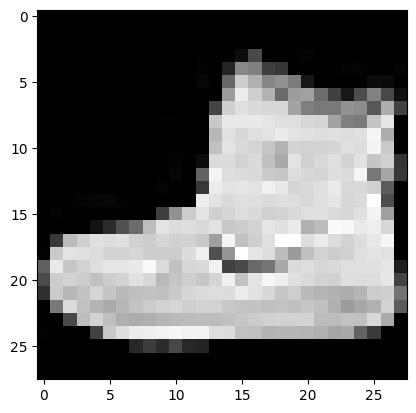

In [ ]:
plt.figure()
plt.imshow(train_images[0],cmap='gray', vmin=0, vmax=255)
plt.grid(False)

- Even though we find that the images are blurry, we can still make out the type of apparel (shoe) from the figure. Let's see how good a simple Neural Network is in doing so!

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- Neural Networks are usually not good at dealing with large integers. So, we rescale the image pixels to be in the range [0, 1]. Note that this is a standard technique while dealing with pixels in Machine Learning

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

- Let's have a look at a number of demo images to see what various apparels in the dataset look like!

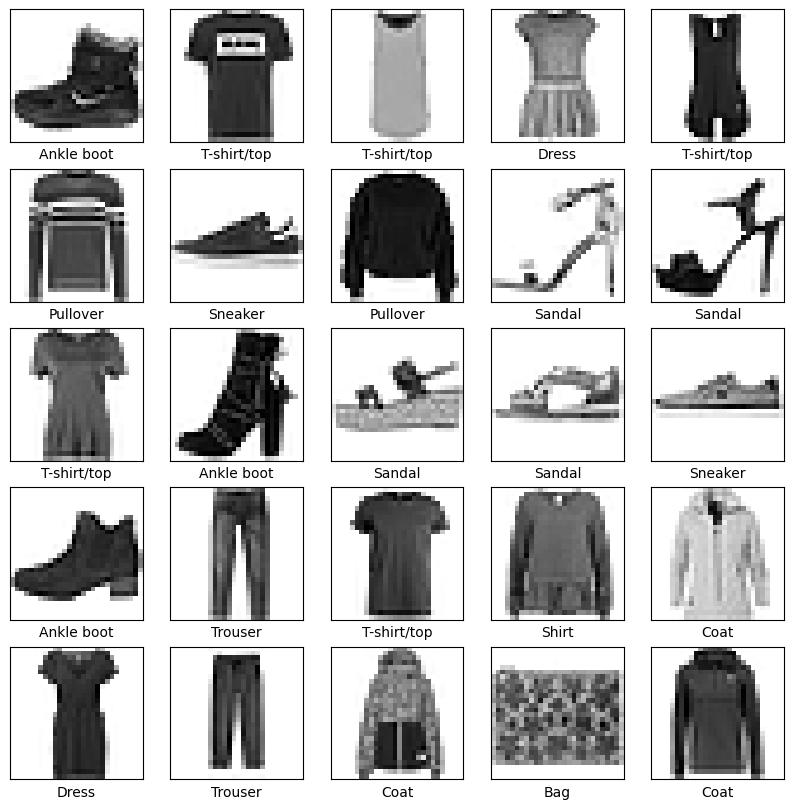

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
	plt.subplot(5,5, i+1)
	plt.xticks([])
	plt.yticks([])
	plt.grid(False)
	plt.imshow(train_images[i], cmap=plt.cm.binary)
	plt.xlabel(class_names[train_labels[i]])

### Let's build a model!
- Before we go ahead and understand how we interpret a model, we need to train a model. Let's build a simplistic classifier, train it and evaluate it's performance on our dataset


In [ ]:
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_1.summary()


model_1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Time to tinker around with LIME!
Let's start by installing LIME and selecting a localized image

## How does LIME work?
We start with selecting an image from a particular locality. A locality usually represents a single data point. In our case, this data point, in our case is an image!

Once this is done, we do the following:
- Data Perturbation: Create modified instances from locality by randomly changing features while keeping the label unchanged.

- Model Prediction: Pass the perturbed instances through the black-box model and record the predictions.

- Feature Extraction: Extract relevant features from the perturbed instances and encode them appropriately.

- Local Model Fitting: Build a simpler, interpretable model (explainer model) to approximate the black-box model's behavior locally.

- Weights Calculation: Assign weights to the perturbed instances based on their proximity to the instance of interest.

- Explanations Generation: Combine the predictions of the explainer model with feature importance to generate explanations.

The explanations highlight the most influential features for the black-box model's prediction on a specific instance, providing insights into the decision-making process. LIME offers local explanations and helps understand complex and opaque models.

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=3b4f12df5519c510aceb2b08c09abaa36ef1f088a6ec2bee2d4bf467a98118e8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


### Let's now select a localized data point

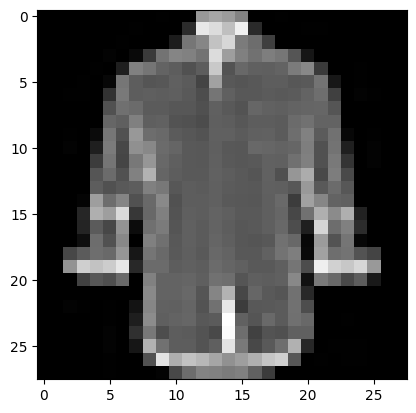

1/1 [==============================] - 0s 140ms/step
Predicted label: Dress, Actual label: Shirt


In [ ]:
idx = 2708 #this is my Xq

img = test_images[idx][np.newaxis, :, :]
actual_label = test_labels[idx]

plt.figure()
plt.imshow(img[0], cmap='gray')
plt.show()

#print(output_vector)
#
output_vector = model_1.predict(img)
print(f"Predicted label: {class_names[np.argmax(output_vector)]}, Actual label: {class_names[actual_label]}")

### Model interpretability with LIME
- Let's start with implementing an end-to-end interpretability algorithm with LIME

In [ ]:
from lime import lime_image #since image is the input, you have lime_text as well
from lime.wrappers.scikit_image import SegmentationAlgorithm #This is my interpretable model (As discussed in step 4)

explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('quickshift', kernel_size=1, max_dist=200, ratio=0.2)

In [ ]:
#Since Lime works with RBG only, We need to find a way for conversion
from skimage.color import gray2rgb, rgb2gray, label2rgb # since the code wants color images
img2 = gray2rgb(img[0])
print(img2.shape)

(28, 28, 3)


In [ ]:
def predict_on_color(img):
  global model_1
  gray_img = rgb2gray(img)
  return model_1.predict(gray_img, verbose = 0)

In [ ]:
%%time
explanation = explainer.explain_instance(img2,
    classifier_fn = predict_on_color,
    top_labels=10, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

  0%|          | 0/10000 [00:00<?, ?it/s]

CPU times: user 1min 7s, sys: 1.63 s, total: 1min 8s
Wall time: 1min 18s


Text(0.5, 1.0, 'Positive/Negative Regions for Shirt')

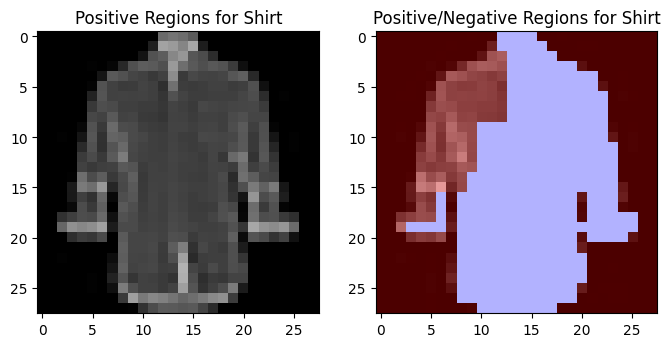

In [ ]:
temp, mask = explanation.get_image_and_mask(test_labels[idx], positive_only=True, num_features=10, hide_rest=False, min_weight = 0.01)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 4))

ax1.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')

ax1.set_title('Positive Regions for {}'.format(class_names[test_labels[idx]]))

temp, mask = explanation.get_image_and_mask(test_labels[idx], positive_only=False, num_features=10, hide_rest=False, min_weight = 0.01)

ax2.imshow(label2rgb(3-mask,temp, bg_label = 0), interpolation = 'nearest')

ax2.set_title('Positive/Negative Regions for {}'.format(class_names[test_labels[idx]]))

**observe**

For the image in right
- the red regions denotes the vulnerable points of model
- Meaning on creating noises in these regions, the model misclassifies

### What is happening in this code?
LIME provides 2 unique interfaces:
- **Segmenter**: A segmenter is responsible for dividing an instance (in our case, an image) into subregions. This allows us to detect which part of our input is most influential.
- **Explainer**: The explainer in LIME is a simpler and interpretable model that is trained to approximate the behavior of the black-box model in the local neighborhood of the instance being explained.

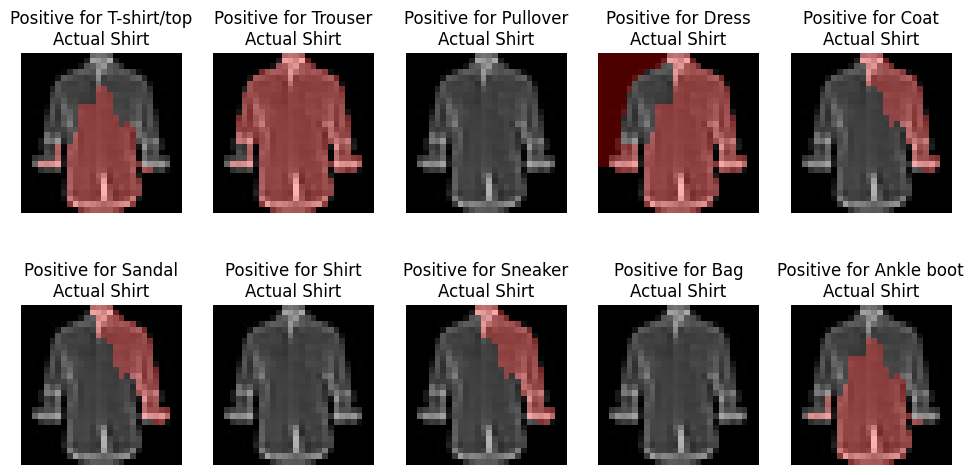

In [ ]:
# now for each class we are adding noise and checking where the model could have mis-interpretted
#what should we change in our iage that instead of predictiong Shirt it starts predicting T shirt/ top etc
#Red are those regions in which if I start adding noise it will go from Actual (shirt) to a particular class (T-shirt)
fig, m_axs = plt.subplots(2,5, figsize = (12,6))
for i, c_ax in enumerate(m_axs.flatten()):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=1000, hide_rest=False, min_weight = 0.01 )
    c_ax.imshow(label2rgb(mask,img2, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for {}\nActual {}'.format(class_names[i], class_names[test_labels[idx]]))
    c_ax.axis('off')

**observe**
- the red regions shows the locality of points where on creating noises causes the model to misclassify
- Notice for Actual Shirt, Bag and Pullover we do not have a red region
 - meaning that for these classes, the model predicts absolutely correctly

# Advantages and disadvantages of LIME

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/399/original/Screenshot_2023-09-24_at_1.45.57_PM.png?1695547861 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/401/original/Screenshot_2023-09-24_at_1.46.02_PM.png?1695548172 width=800>

# SHAP: Alternate way to find interpretability

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/402/original/Screenshot_2023-09-24_at_1.46.09_PM.png?1695548196 width=800>

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/403/original/Screenshot_2023-09-24_at_1.46.16_PM.png?1695548241 width=800>

- **SHAP values** (SHapley Additive exPlanations) is a method rooted in cooperative game theory that enhances the transparency and interpretability of machine learning models.
- It provides a unified framework for attributing the contributions of each feature towards a prediction, addressing the limitations of traditional linear models and feature importances in tree-based models.

- Unlike linear models that rely on feature coefficients, which may be influenced by variable scales and fail to capture local importance, SHAP values offer a more comprehensive understanding of feature importance.
- They consider the impact of each feature when combined with different subsets of features, accounting for interactions and dependencies among them.

- SHAP values are based on the concept of Shapley values from cooperative game theory. By calculating the marginal contribution of a feature when added to or removed from coalitions of features, SHAP values ensure fairness and consistency in attributing importance.

- The insights provided by SHAP values are interpretable and nuanced, revealing the relative importance of each feature in a prediction. Visualizations, such as summary plots, individual feature importance plots, dependence plots, or force plots, allow for a detailed exploration of feature impact on predictions.

## Understanding SHAP : Example1

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/404/original/Screenshot_2023-09-24_at_1.46.25_PM.png?1695548316 width=800>

For each 6 people, we find the difference between the base and the predicted defaulting %:
- lets call them {$\phi_1,\phi_2,\phi_3,\phi_4,\phi_5,\phi_6$}

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/050/405/original/Screenshot_2023-09-24_at_1.46.37_PM.png?1695548370 width=800>

For final $\phi$ (getting a general baseline defaulting value for these people)
- We find the avg of all the {$\phi_1,\phi_2,\phi_3,\phi_4,\phi_5,\phi_6$}

- $\phi = \frac{\phi_1+\phi_2+\phi_3+\phi_4+\phi_5+\phi_6}{6}$

# Another example

Shapley values are a concept in the field of cooperative game theory introduced by Lloyd Shapley in 1953. They aim to measure the contribution of each player in a game. In the context of ML models, Shapley values can be used to assess the interpretability of these models.

To calculate the Shapley value of a feature in an ML model, we consider it as a player in a game. The game is the function that generates predictions, and the "profit" corresponds to the prediction itself. The Shapley value of a feature represents its average marginal contribution among all possible coalitions.

For example, let's consider a group of friends (A, B, C, D) working together to obtain a profit P. To distribute the profit fairly, we calculate the Shapley value of each friend. To do this, we compute the difference between the profit generated when the friend is present and the profit generated when they are absent (marginal contribution). This calculation is performed for all possible subgroups where the friend is present. The Shapley value is then obtained by averaging these marginal contributions.




#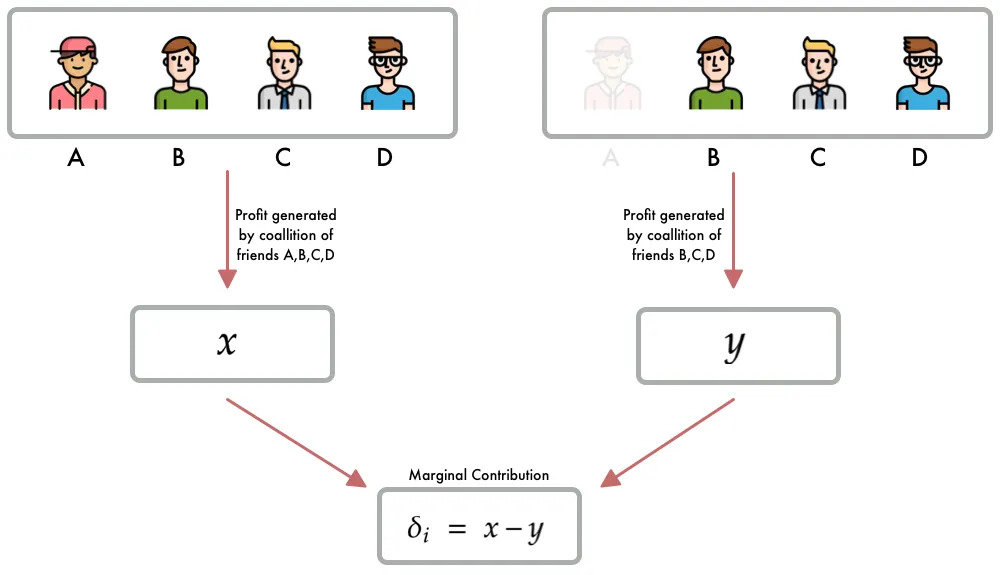

Below figures shows the representation of the calculation of the Shapley value for the friend A. However, calculating Shapley values for each instance of each feature in an ML model can be computationally challenging, especially when dealing with a large number of features. This problem is known to be NP-hard.

This is where SHAP (SHapley Additive exPlanations) comes into play. SHAP provides an approach to interpreting ML models. It addresses the computational complexity by approximating Shapley values using various techniques. By utilizing SHAP, we can gain insights into the contribution of each feature to the predictions made by an ML model, enhancing the interpretability of the model.

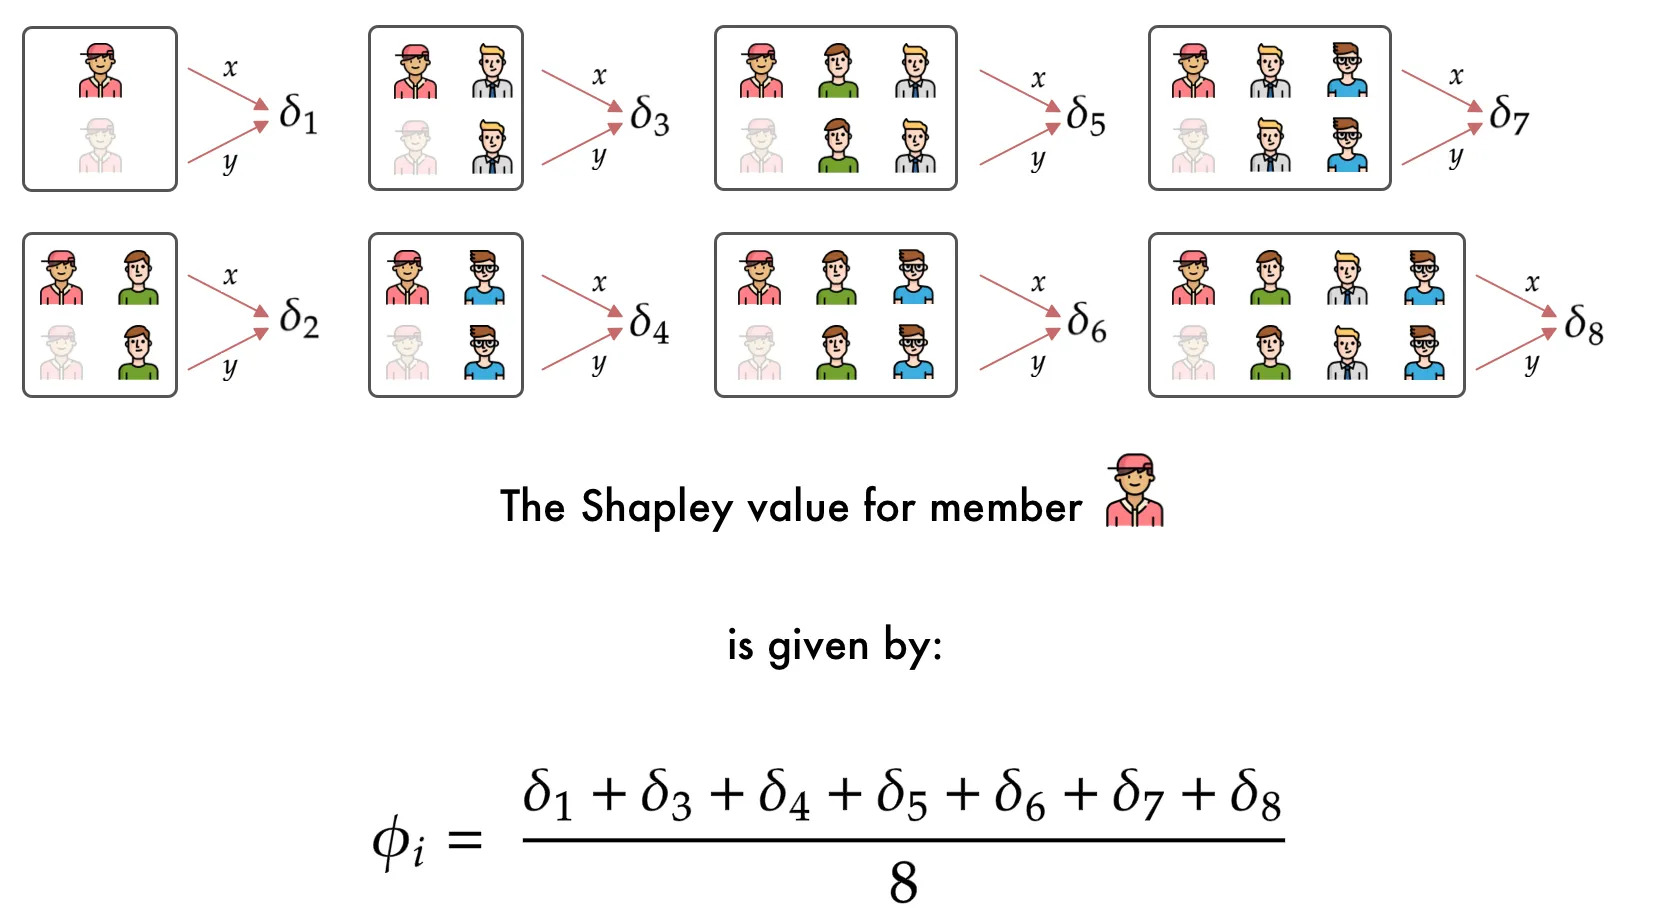

### Understanding SHAP
like with LIME, let's start with building an end-to-end algorithm and understand what's going on in there!

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 64)               

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/9998 [00:00<?, ?it/s]

Partition explainer: 3it [00:39, 19.65s/it]


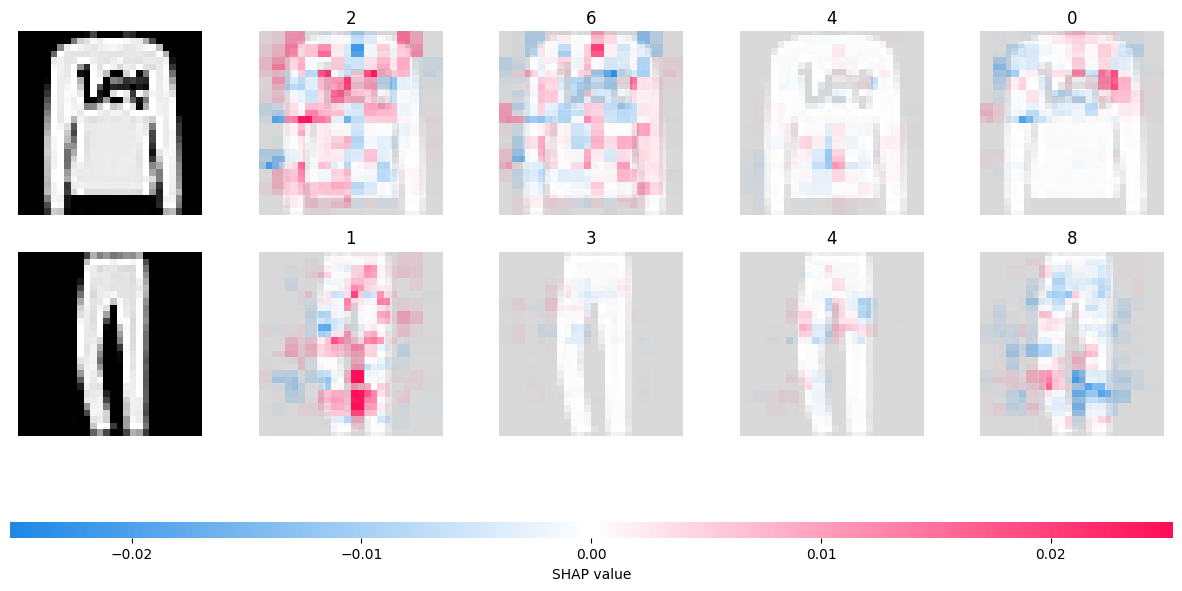

In [ ]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import shap
from PIL import Image

# Load the FashionMNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0

# Define the custom CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Python function to get model output; replace this function with your own model function
def predict(img: np.ndarray) -> np.ndarray:
    return model.predict(img, verbose = 0)

# Check that predictions work correctly
out = predict(X_test[1:3])
classes = np.argmax(out, axis=1)
print(f'Classes: {classes}')

# Prepare data transformation pipeline
mean = [0.5]
std = [0.5]

def transform_fn(x: np.ndarray) -> np.ndarray:
    return (x - mean) / std

def inv_transform_fn(x: np.ndarray) -> np.ndarray:
    return (x * std) + mean

# Define a masker that is used to mask out partitions of the input image
masker_blur = shap.maskers.Image("blur(128,128)", X_train[0].shape)

# Create an explainer with the model and image masker
explainer = shap.Explainer(predict, masker_blur, output_names=[str(i) for i in range(10)])

# Here we explain two images using 10000 evaluations of the underlying model to estimate the SHAP values
shap_values = explainer(X_test[1:3], max_evals=10000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

# Reshape and inverse transform the SHAP values and data
shap_values.data = inv_transform_fn(shap_values.data)
shap_values.values = [val for val in np.moveaxis(shap_values.values,-1, 0)]

# Plot the SHAP values
shap.image_plot(shap_values=shap_values.values,
                pixel_values=shap_values.data,
                labels=shap_values.output_names)


### SHAP Algorithm
- In order To calculate SHAP (SHapley Additive exPlanations) values, we do the following:
- Choose a reference point as a baseline for feature contribution measurement.
- Explore all feature permutations for a specific instance.
- Evaluate each feature's contribution by comparing predictions with and without the feature.
- Apply the Shapley value formula to calculate feature importance.
- Interpret positive/negative SHAP values as positive/negative contributions.

SHAP values offer a comprehensive way to understand feature importance, accounting for interactions and dependencies, aiding interpretation of complex models.

### Conclusion
- We have explored LIME and SHAP, two of the most popular techniques for model interpretability.
- We found that model interpretablity can be an effective tool for transparancy, debugging and bias mitigation in Neural Network architectures!